# Задача
В ходе выполнения проекта необходимо решить задачу регрессии, обучив алгоритм предсказывать данные на существующем датасете.

# Описание данных

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

В качестве набора данных будем использовать датасет с прогноза поступления в университет (Admission_Predict)
Будем решать задачу регрессии. В качестве целевого признака возьмем колонку "Шанс поступления" (Chance of Admit)

In [21]:
data=pd.read_csv("Admission_Predict.csv")

In [22]:
data.shape

(400, 9)

In [23]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Отсутствующих данных нет

# Разведочный анализ

In [24]:
data.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [25]:
data.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.340000  
25%      3.000000    8.170000    0.000000          0.640000  
50%      3.500000    8.610000    1.000000          0.730000  
75%      4.000000    9.062500    1.000000          0.830000  
max      5.000000    9.920000    1.000000          0.970000

In [26]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


Проверим корреляцию между признаками

# Корреляционный анализ, выбор подходящих признаков

In [28]:
corr = data.corr()

In [29]:
corr

Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   
Chance of Admit      0.042336   0.802610     0.791594           0.711250   

                        SOP      LOR       CGPA  Research  Chance of Admit   
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138          0.042336  
GRE Score          0.612831  0.557555  0.833060  0.580391          0.802610  
TOEFL Score        0.657981  0.567721  0.828417  0.489858          0.791594  
University Rating  0.734523  0.660123  0.746479  0.447783          0.711250  
SOP                1.000000  0.729593  0.718144  0.444029          0.675732  
LOR                0.729593  1.000000  0.670211  0.396859          0.669889  
CGPA               0.718144  0.670211  1.000000  0.521654          0.873289  
Research           0.444029  0.396859  0.521654  1.000000          0.553202  
Chance of Admit    0.675732  0.669889  0.873289  0.553202          1.000000

Построим тепловую карту корреляции для более наглядного представления

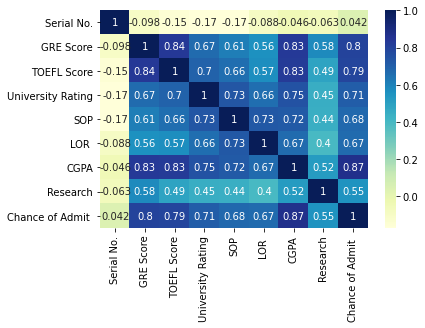

In [30]:
sns.heatmap(corr, cmap="YlGnBu", annot=True)

Построим графики, чтобы понять структуру данных

In [31]:
data = data.drop(['Serial No.'], axis=1)

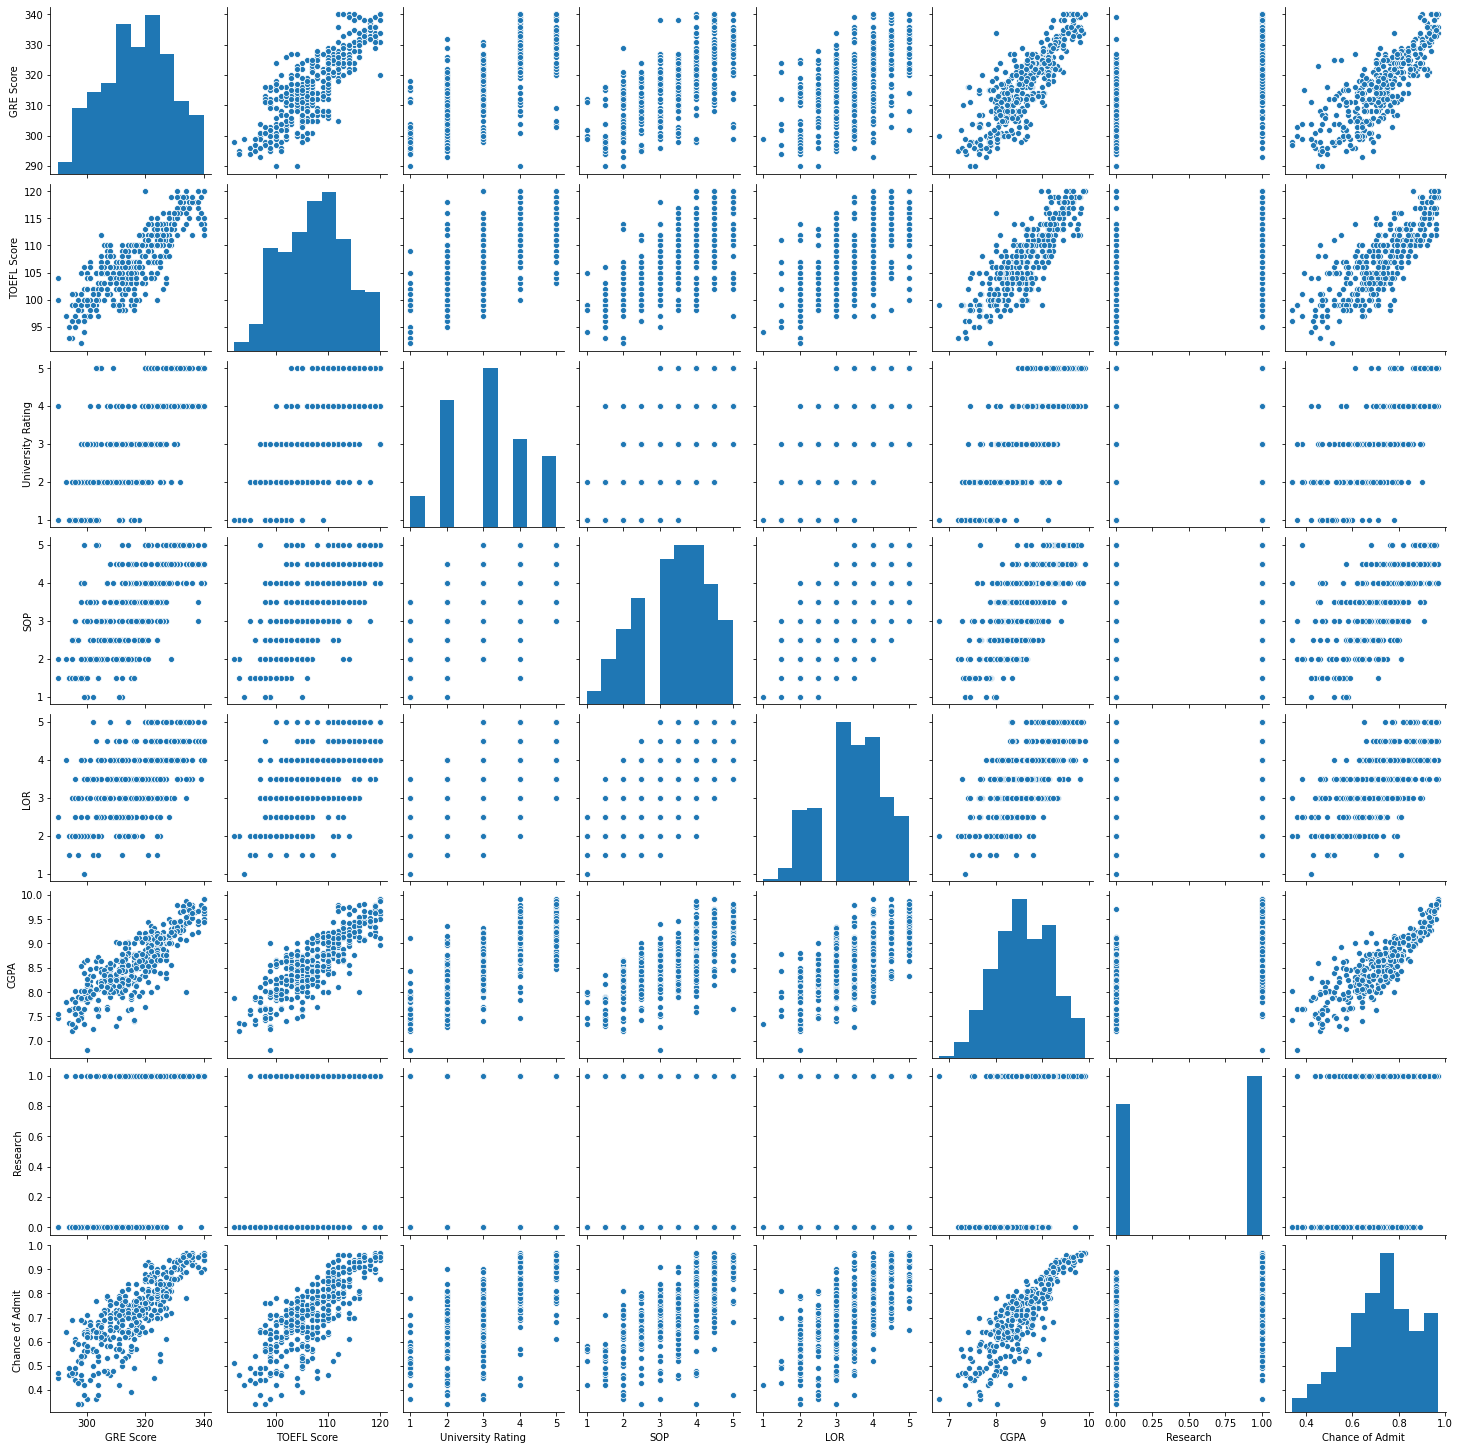

In [32]:
sns.pairplot(data)

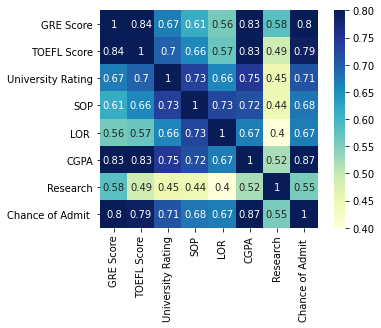

In [34]:
corr = data.corr()
sns.heatmap(corr, square=True, vmin=0.4, vmax=0.8, cmap="YlGnBu", annot=True)

Мы можем решать задачу регрессии, пытаясь предсказать шанс (%) поступления

Выделим целевой признак и нормализуем данные

In [35]:
target = data['Chance of Admit ']
data = data.drop(['Chance of Admit '], axis=1)

In [36]:
from sklearn import preprocessing
data = preprocessing.scale(data)

# Метрики качества

В качестве метрик качества мы будет использовать среднюю квадратичную ошибку, среднюю абсолютную ошибку и коэффициент детерминации

Средняя квадратичная ошибка:   
$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert y_i - \hat{y_i} \rvert $  
где:     
$y$ - истинное значение целевого признака  
$\hat{y}$ - предсказанное значение целевого признака  
$N$ - размер тестовой выборки   
Чем ближе значение к нулю, тем лучше качество регрессии.   
Основная проблема метрики состоит в том, что она не нормирована.  

Средняя абсолютная ошибка:   
$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2 $   
где:   
$y$ - истинное значение целевого признака   
$\hat{y}$ - предсказанное значение целевого признака   
$N$ - размер тестовой выборки   


Коэффициент детерминации:   
$R^2(y,\hat{y}) = 1 - \frac{\sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2}{\sum\limits_{i=1}^N ( y_i - \overline{y_i} )^2} $    
где:   
$y$ - истинное значение целевого признака   
$\hat{y}$ - предсказанное значение целевого признака   
$N$ - размер тестовой выборки    
$\overline{y_i} = \frac{1}{N} \cdot \sum\limits_{i=1}^N y_i $    

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# Выбор моделей

В качестве моделей регрессии выберем модель BaggingRegressor, KneighborsRegressor и RandomForestRegressor

In [38]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Формирование обучающей и тестовой выборки

разделим выборку в пропорции 1:4

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=1
)

In [42]:
X_train.shape, y_train.shape

((320, 7), (320,))

In [43]:
X_test.shape, y_test.shape

((80, 7), (80,))

# Базовое решение для всех моделей

In [46]:
models = [BaggingRegressor(), KNeighborsRegressor(), RandomForestRegressor()]
models

[BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False),
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)]

In [47]:
def quality(test, predicted, metrics_arr):
    mse = mean_squared_error(test, predicted)
    mae = mean_absolute_error(test, predicted)
    r2 = r2_score(test, predicted)
    metrics_arr.append((mse, mae, r2))
    print("  Метрики качества:")
    print("     Средняя квадратичная ошибка: "+ str(mse))
    print("     Средняя абсолютная ошибка: "+ str(mae))
    print("     Коэффициент детерминации: "+ str(r2))

__________________________________________________
BaggingRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 0.005557587500000001
     Средняя абсолютная ошибка: 0.052012499999999996
     Коэффициент детерминации: 0.7596972211037214
__________________________________________________
KNeighborsRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 0.0051067
     Средняя абсолютная ошибка: 0.0506
     Коэффициент детерминации: 0.7791930039806615
__________________________________________________
RandomForestRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 0.005391299124999991
     Средняя абсолютная ошибка: 0.05039124999999994
     Коэффициент детерминации: 0.7668873118779376


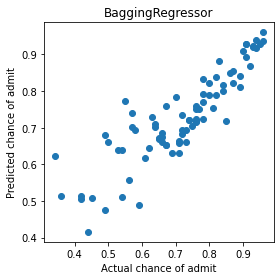

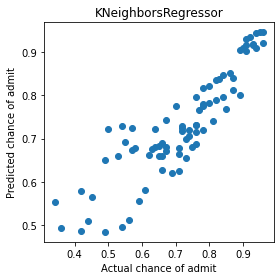

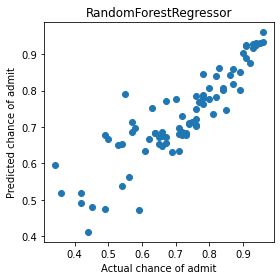

In [60]:
metrics_arr = []
for model in models:
    print("_" * 50)
    print(type(model).__name__)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test, predicted)
    plt.title(type(model).__name__)
    plt.xlabel('Actual chance of admit')
    plt.ylabel('Predicted chance of admit')
    plt.tight_layout()
    quality(y_test, predicted, metrics_arr)

In [61]:
def metrics_bar(metric_name, models, metrics_values):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.barh(models, metrics_values)
    ax.set_title(metric_name)
    plt.show()

In [62]:
mae, mse, r2 = [], [], []
for v1, v2, v3 in metrics_arr:
    mae.append(v1)
    mse.append(v2)
    r2.append(v3)

mae, mse, r2

([0.005557587500000001, 0.0051067, 0.005391299124999991],
 [0.052012499999999996, 0.0506, 0.05039124999999994],
 [0.7596972211037214, 0.7791930039806615, 0.7668873118779376])

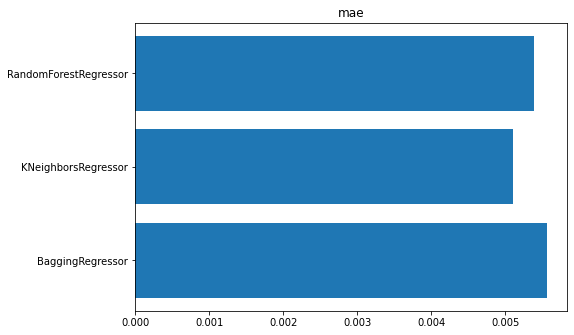

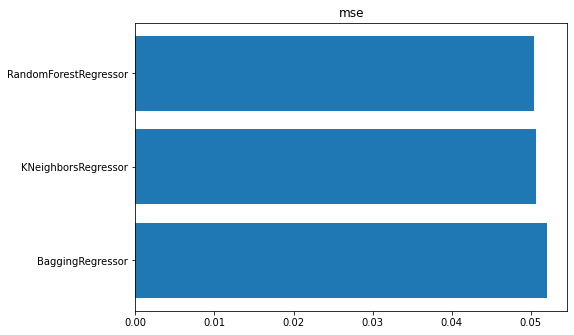

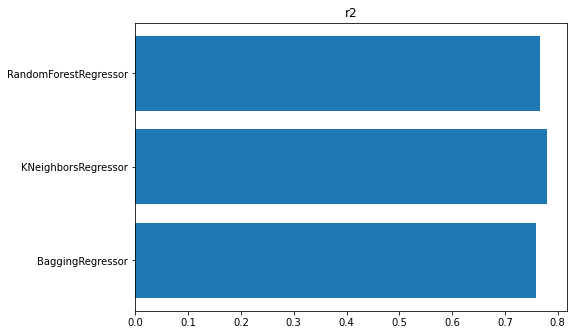

In [63]:
metrics_names = ['mae', 'mse', 'r2']
models_names = [type(m).__name__ for m in models]
for metric, values in list(zip(metrics_names, (mae, mse, r2))):
    metrics_bar(metric, models_names, values)

# Подбор гиперпараметров моделей

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

### Подбор гиперпараметров для модели BaggingRegressor

In [65]:
param_grid = {
    'n_estimators' : [1, 3, 6, 9, 12, 15, 20, 25],
    'max_samples' : [0.05, 0.1, 0.2, 0.5],
    'max_features' : [1, 2, 3, 4]
}

bagging = BaggingRegressor()
grid = GridSearchCV(estimator=bagging, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_features': [1, 2, 3, 4],
                         'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [1, 3, 6, 9, 12, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.7570686473693222
BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=4, max_samples=0.1, n_estimators=15, n_jobs=None,


### Подбор параметров для KNeighborsRegressor

In [66]:
grid_params = {
    'n_neighbors': [3, 5, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsRegressor(), grid_params, verbose=1, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)
0.7596915153091609
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='distance')


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.5s finished


### Подбор параметров для RandomForestRegressor

In [67]:
grid_params= {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3, 5, 9, 12, 15],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}
grid = GridSearchCV(RandomForestRegressor(), grid_params, cv=2, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

# Обучение с оптимальными значениями гиперпараметров

__________________________________________________
BaggingRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 0.005443254048061222
     Средняя абсолютная ошибка: 0.050855107142857126
     Коэффициент детерминации: 0.7646408492916164
__________________________________________________
KNeighborsRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 0.0048320105341591426
     Средняя абсолютная ошибка: 0.04812991183002667
     Коэффициент детерминации: 0.7910702154460847
__________________________________________________
RandomForestRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 0.005258976967176969
     Средняя абсолютная ошибка: 0.05008830580063441
     Коэффициент детерминации: 0.7726087480648485


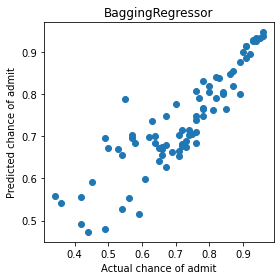

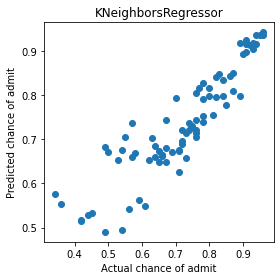

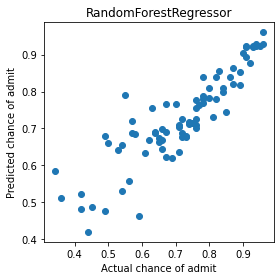

In [70]:
models = [BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=4, max_samples=0.5, n_estimators=25, n_jobs=None,
                 oob_score=False, random_state=None, verbose=0,
                 warm_start=False), 
          KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='distance'), 
          RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
         ]

metrics_arr = []
for model in models:
    print("_" * 50)
    print(type(model).__name__)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test,predicted)
    plt.title(type(model).__name__)
    plt.xlabel('Actual chance of admit')
    plt.ylabel('Predicted chance of admit')
    plt.tight_layout()
    quality(y_test, predicted, metrics_arr)

In [71]:
mae, mse, r2 = [], [], []
for v1, v2, v3 in metrics_arr:
    mae.append(v1)
    mse.append(v2)
    r2.append(v3)

mae, mse, r2

([0.005443254048061222, 0.0048320105341591426, 0.005258976967176969],
 [0.050855107142857126, 0.04812991183002667, 0.05008830580063441],
 [0.7646408492916164, 0.7910702154460847, 0.7726087480648485])

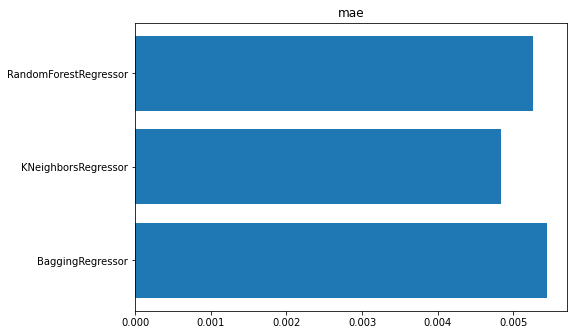

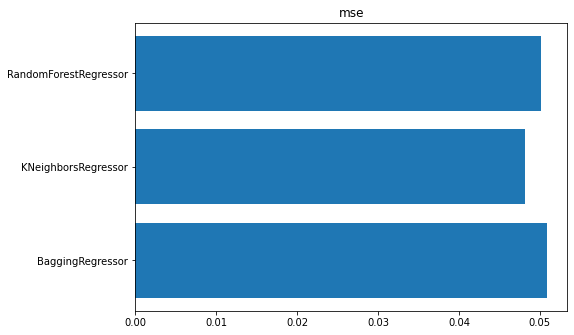

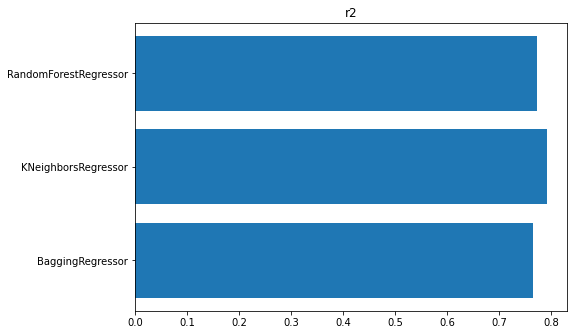

In [72]:
metrics_names = ['mae', 'mse', 'r2']
models_names = [type(m).__name__ for m in models]
for metric, values in list(zip(metrics_names, (mae, mse, r2))):
    metrics_bar(metric, models_names, values)

Лучшей оказалась модель ближайших соседей.
Оптимизация гиперпараметров улучшила модель случайного леса, но лучшим все равно остался метод ближайших соседей. 

Метрики качества показывают, что все модели, построенные в результате выполнения проекта, являются достаточно хорошими для их использования. При этом классический алгоритм показал себя лучше ансамблевых методов

# Выводы
В ходе выполнения проекта по анализу данных был выбран датасет для решения задачи регрессии.   
Были выбраны 3 модели, входящие в пакет sci-kit learn, и метрики качества, подходящие для регрессионного анализа.
После проведенной оптимизации параметров моделей был сделан вывод о лучшей модели для данной задачи. Ею оказался метод ближайших соседей.